In [26]:
# librerias para manejo de datos
use_plotly = False
import scipy
import random
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import figure_factory as ff
from plotly.subplots import make_subplots
if use_plotly:
    import plotly.graph_objects as go
    import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
mat_data = scipy.io.loadmat('data_clusters.mat')

In [3]:
# Example: Assuming 'my_variable' is a key in data_to_convert and contains a 1D array
#df_xx = pd.DataFrame(data_to_convert['xx'])
#df_tt = pd.DataFrame(data_to_convert['yy'])

    # Example: If you have multiple variables to put into columns
    # df = pd.DataFrame({
    #     'column1_name': data_to_convert['variable_from_mat_file_1'].flatten(),
    #     'column2_name': data_to_convert['variable_from_mat_file_2'].flatten()
    # })

In [4]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Sep 18 06:06:00 2024',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[351, 162],
        [181, 100],
        [483, 345],
        [302, 167],
        [422, 108],
        [ 29,  20],
        [441, 342],
        [457, 346],
        [128,  62],
        [130, 141],
        [348, 279],
        [ 99, 123],
        [ 27,  27],
        [ 84, 115],
        [112, 126],
        [145, 129],
        [351, 157],
        [294, 261],
        [102, 142],
        [103, 142],
        [144, 126],
        [315, 161],
        [475, 354],
        [279, 244],
        [354, 179],
        [101, 102],
        [168, 126],
        [284, 286],
        [452, 364],
        [466, 370],
        [ 18,  19],
        [132, 114],
        [337, 151],
        [410, 127],
        [299, 135],
        [306, 164],
        [323, 150],
        [284, 290],
        [330, 154],
        [339, 141],
        [134,  96],
        [317, 185],
        [ 28,  13

In [5]:
# Assuming mat_data is the dictionary loaded from the .mat file
# Extract the array 'X'
X_data = mat_data['X']

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(X_data, columns=['feature_1', 'feature_2']) # You can name the columns appropriately

# Display the first few rows of the DataFrame
display(df.head())

,feature_1,feature_2
0,351,162
1,181,100
2,483,345
3,302,167
4,422,108


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   feature_1  136 non-null    uint16
 1   feature_2  136 non-null    uint16
 2   cluster    136 non-null    int32 
dtypes: int32(1), uint16(2)
memory usage: 1.2 KB


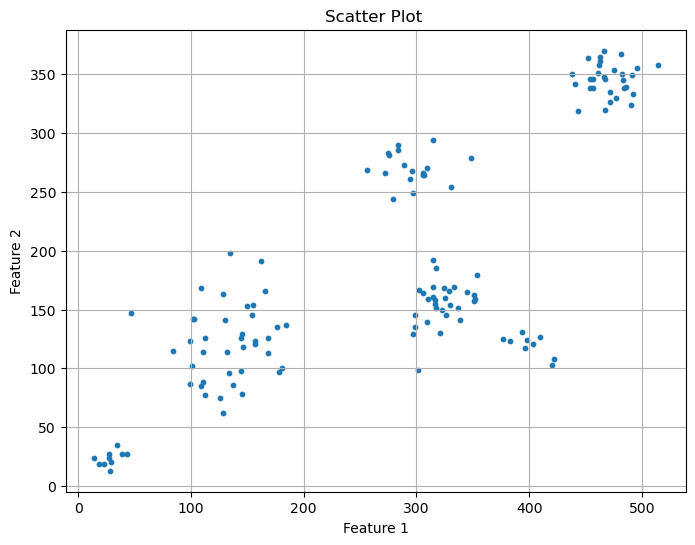

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot ')
plt.grid(True)
plt.show()

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Display the first few rows of the scaled data
display(df_scaled[:5])

array([[ 0.4876573 , -0.28143758],
       [-0.69690215, -0.88481458],
       [ 1.40743288,  1.49949773],
       [ 0.14622546, -0.23277815],
       [ 0.98238507, -0.80695948]])

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

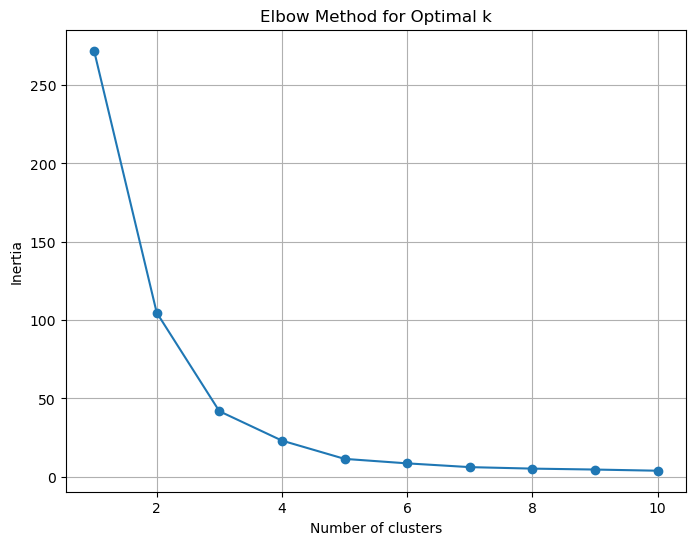

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [12]:
# Based on the Elbow method plot from the previous step, let's choose the optimal number of clusters.
# Looking at the plot, there seems to be an elbow around k=3. Let's choose k=3 as the optimal number of clusters.
optimal_k = 3

# Instantiate a KMeans object with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans_model.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


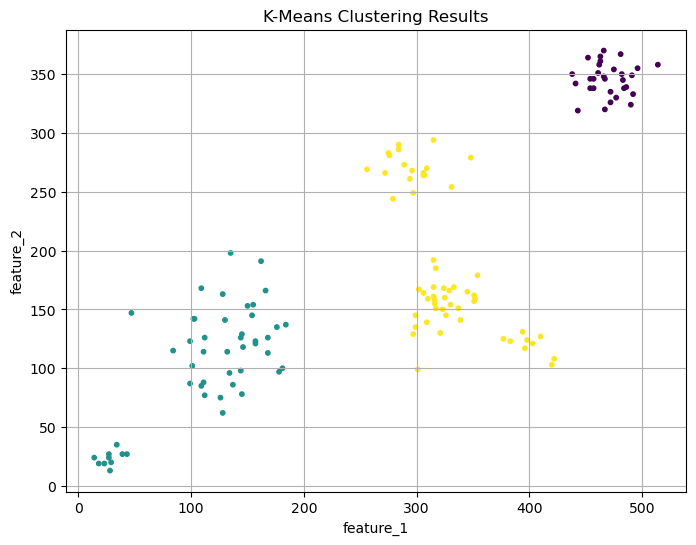

In [13]:
# Obtain the cluster labels
cluster_labels = kmeans_model.labels_

# Add a new column named 'cluster' to the original DataFrame df
df['cluster'] = cluster_labels

# Create a scatter plot of 'feature_1' versus 'feature_2' from the df DataFrame, colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], c=df['cluster'], cmap='viridis', s=10)

# Add a title and labels
plt.title('K-Means Clustering Results')
plt.xlabel('feature_1')
plt.ylabel('feature_2')

# Display the scatter plot
plt.grid(True)
plt.show()

In [14]:
cluster_stats = df.groupby('cluster')[['feature_1', 'feature_2']].agg(['mean', 'median', 'std', 'min', 'max'])
display(cluster_stats)

feature_1                               feature_2                    \
               mean median        std  min  max        mean median        std   
cluster                                                                         
0        470.200000  467.0  17.582123  438  514  345.500000  346.0  13.790927   
1        112.469388  128.0  50.874069   14  184  101.959184  114.0  49.284446   
2        326.333333  316.0  38.982750  256  422  186.035088  162.0  60.925295   

                   
         min  max  
cluster            
0        319  370  
1         13  198  
2         99  294

In [15]:
silhouette_avg = silhouette_score(df_scaled, kmeans_model.labels_)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.6259875748455701


## SOM

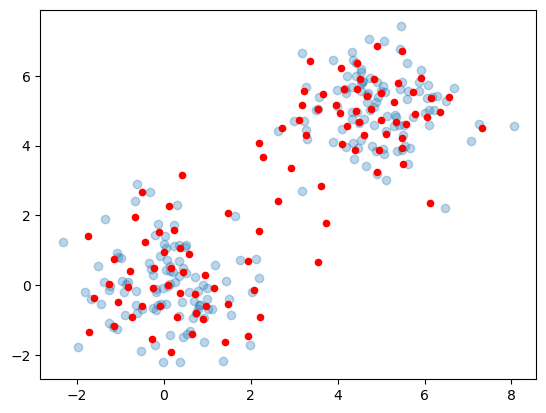

In [16]:
# Datos simples: dos nubes en 2D
X1 = np.random.randn(100, 2) + np.array([0, 0])
X2 = np.random.randn(100, 2) + np.array([5, 5])
X = np.vstack([X1, X2])

# Rejilla 10x10 = 100 nodos, cada uno con pesos 2D
m, n = 10, 10
W = np.random.rand(m*n, 2) * 6   # valores iniciales ~ [0,6]

coords = np.array([(i, j) for i in range(m) for j in range(n)])

def neighborhood(bmu, sigma):
    d2 = np.sum((coords - coords[bmu])**2, axis=1)
    return np.exp(-d2 / (2*sigma*sigma))

for t in range(50):  # épocas
    alpha = 0.5 * np.exp(-t/50)
    sigma = max(m,n)/2 * np.exp(-t/20)
    for x in X:
        bmu = np.argmin(np.linalg.norm(W - x, axis=1))
        h = neighborhood(bmu, sigma)
        W += alpha * h[:, None] * (x - W)

# Visualizar
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(W[:,0], W[:,1], c='red', s=20)
plt.show()

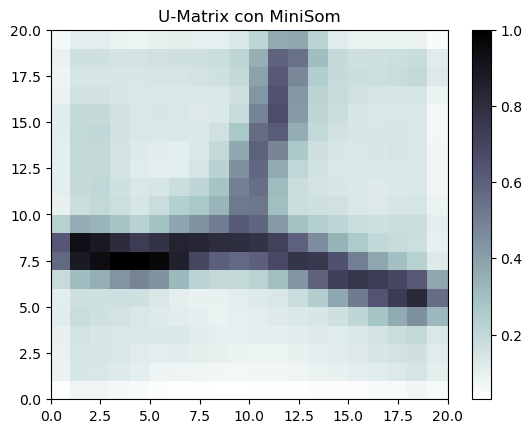

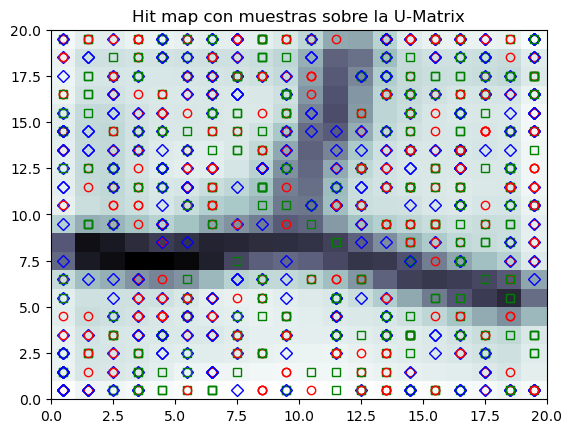

In [21]:
# Datos sintéticos: tres grupos en 2D
rng = np.random.default_rng(1)
N = 900
X = np.vstack([
    rng.normal([0, 0], [0.5, 0.5], size=(N//3, 2)),
    rng.normal([4, 4], [0.6, 0.6], size=(N//3, 2)),
    rng.normal([0, 5], [0.5, 0.7], size=(N//3, 2)),
])

# SOM 20x20
som = MiniSom(x=20, y=20, input_len=2, sigma=3.0, learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=1)
som.random_weights_init(X)
som.train_random(X, num_iteration=5000)

# U-Matrix
plt.figure()
plt.pcolor(som.distance_map().T, cmap='bone_r')  # transpose para visualizar
plt.colorbar()
plt.title('U-Matrix con MiniSom')

# Hit map
plt.figure()
plt.pcolor(som.distance_map().T, cmap='bone_r')
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for cnt, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[cnt % 3], markerfacecolor='None',
             markeredgecolor=colors[cnt % 3], markersize=6, markeredgewidth=1)
plt.title('Hit map con muestras sobre la U-Matrix')
plt.show()

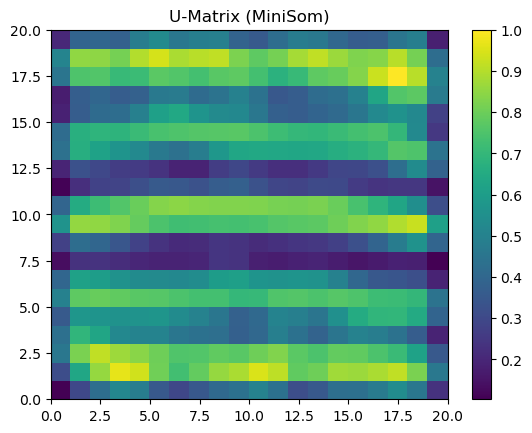

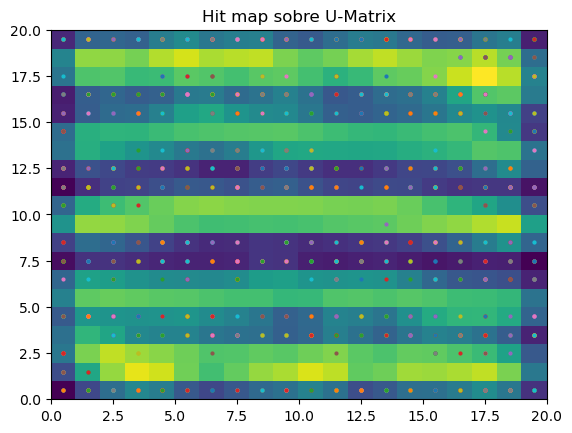

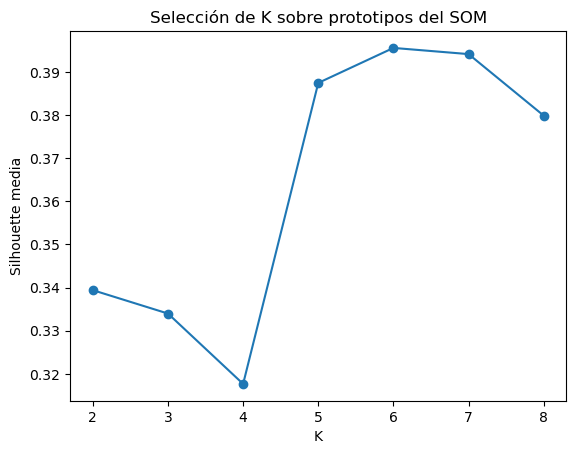

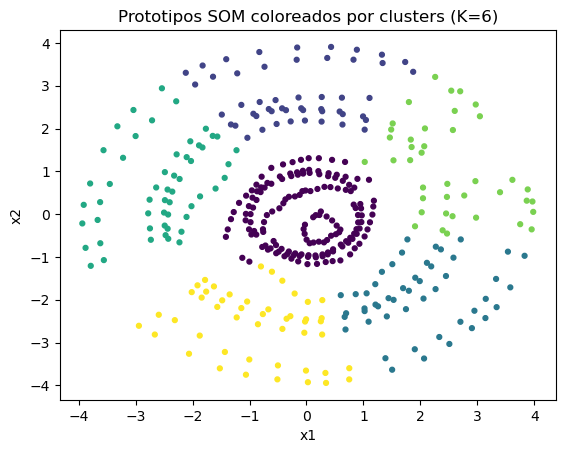

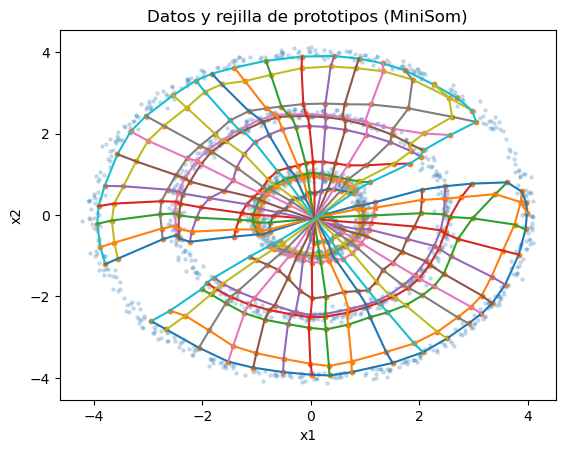

In [22]:
rng = np.random.default_rng(7)

# --------- Datos: círculos concéntricos ----------
def concentric_circles(n_per_ring=(500, 500, 500), radii=(1.0, 2.5, 4.0), noise=0.08):
    X = []
    for n, r in zip(n_per_ring, radii):
        theta = rng.uniform(0, 2*np.pi, size=n)
        x = r*np.c_[np.cos(theta), np.sin(theta)]
        x += rng.normal(0, noise, size=x.shape)
        X.append(x)
    return np.vstack(X).astype(np.float64)

X = concentric_circles()

# --------- SOM con MiniSom ----------
m, n = 20, 20
som = MiniSom(x=m, y=n, input_len=2, sigma=3.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=7)

som.random_weights_init(X)
som.train_random(X, num_iteration=7000)

# --------- U-Matrix y Hit map ----------
U = som.distance_map()             # (m, n)
hits = np.zeros((m, n), dtype=int)
for x in X:
    i, j = som.winner(x)
    hits[i, j] += 1

plt.figure()
plt.pcolor(U.T)        # .T para visualizar con ejes estándar
plt.colorbar()
plt.title('U-Matrix (MiniSom)')

plt.figure()
plt.pcolor(U.T)
for x in X:
    i, j = som.winner(x)
    plt.plot(i+0.5, j+0.5, 'o', markersize=2)
plt.title('Hit map sobre U-Matrix')

# --------- Prototipos y selección de K ----------
W = som.get_weights().reshape(m*n, 2)   # (400, 2)

Ks = range(2, 9)
sil = []
labels_by_K = {}
for K in Ks:
    km = KMeans(n_clusters=K, n_init=10, random_state=7)
    lab = km.fit_predict(W)
    s = silhouette_score(W, lab)
    sil.append(s)
    labels_by_K[K] = lab

# Curva silhouette
plt.figure()
plt.plot(list(Ks), sil, marker='o')
plt.xticks(list(Ks))
plt.xlabel('K'); plt.ylabel('Silhouette media')
plt.title('Selección de K sobre prototipos del SOM')

# Prototipos coloreados con K*
K_star = list(Ks)[int(np.argmax(sil))]
lab_star = labels_by_K[K_star]
plt.figure()
plt.scatter(W[:,0], W[:,1], c=lab_star, s=12)
plt.title(f'Prototipos SOM coloreados por clusters (K={K_star})')
plt.xlabel('x1'); plt.ylabel('x2')

# Rejilla de prototipos sobre datos
Wg = som.get_weights()  # (m, n, 2)
plt.figure()
plt.scatter(X[:,0], X[:,1], s=5, alpha=0.2)
plt.plot(Wg[:,:,0], Wg[:,:,1])
plt.plot(Wg[:,:,0].T, Wg[:,:,1].T)
plt.scatter(W[:,0], W[:,1], s=10)
plt.title('Datos y rejilla de prototipos (MiniSom)')
plt.xlabel('x1'); plt.ylabel('x2')

plt.show()

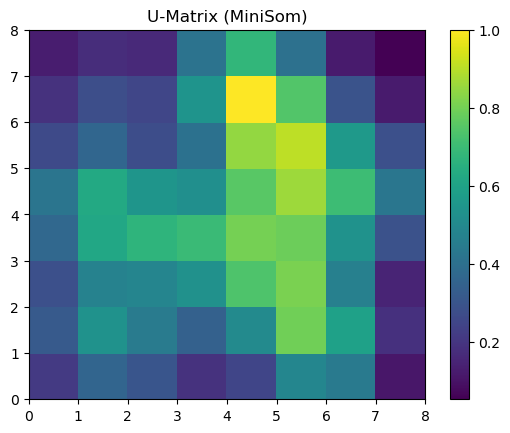

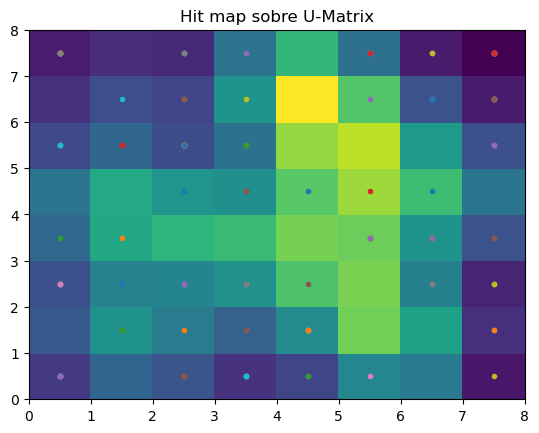

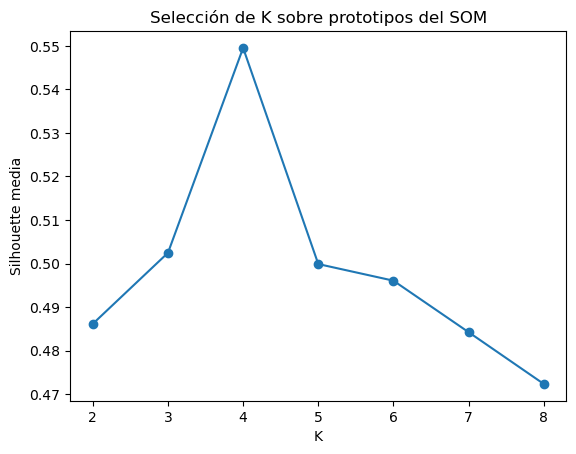

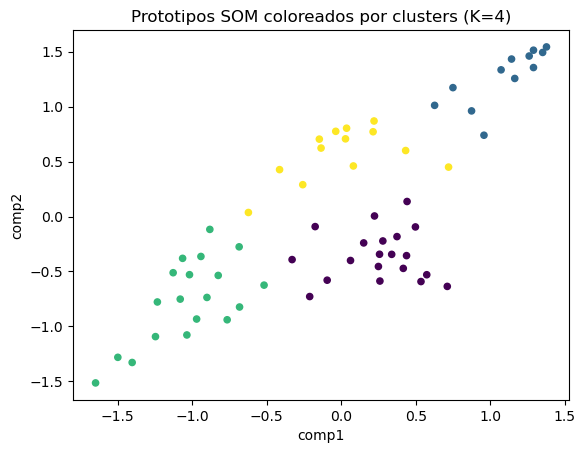

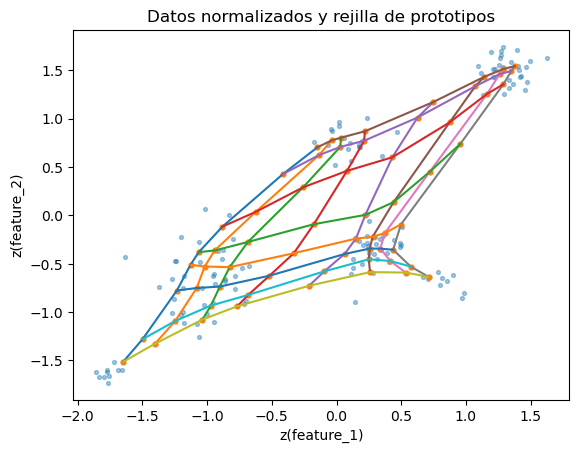

In [24]:
# ---------- 1) Datos ----------
# df = pd.DataFrame(X_data, columns=['feature_1','feature_2'])
assert set(df.columns) >= {'feature_1','feature_2'}
X_raw = df[['feature_1','feature_2']].to_numpy(dtype=float)

# Normalización: z-score por defecto (cambia a MinMaxScaler() si prefieres)
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# --- Normalización Min-Max ---
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X_raw)

N, d = X.shape
# Tamaño de rejilla ≈ 5*sqrt(N) nodos → cercano a 8x8 para N≈150
m = n = 8

# ---------- 2) Entrenar SOM ----------
som = MiniSom(x=m, y=n, input_len=d, sigma=3.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=7)
som.random_weights_init(X)
som.train_random(X, num_iteration=3000)   # 10–20×N suele ir bien

# ---------- 3) U-Matrix y Hit map ----------
U = som.distance_map()           # (m,n)
hits = np.zeros((m, n), dtype=int)
for x in X:
    i, j = som.winner(x)
    hits[i, j] += 1

plt.figure(); plt.pcolor(U.T); plt.colorbar(); plt.title('U-Matrix (MiniSom)')
plt.figure(); plt.pcolor(U.T)
for x in X:
    i, j = som.winner(x); plt.plot(i+0.5, j+0.5, 'o', markersize=3)
plt.title('Hit map sobre U-Matrix')

# ---------- 4) Selección de K en prototipos ----------
W = som.get_weights().reshape(m*n, d)     # (64, 2)
Ks = range(2, 9)
sil, labels_by_K = [], {}
for K in Ks:
    km = KMeans(n_clusters=K, n_init=20, random_state=7)
    lab = km.fit_predict(W)
    sil.append(silhouette_score(W, lab))
    labels_by_K[K] = lab

plt.figure(); plt.plot(list(Ks), sil, marker='o')
plt.xticks(list(Ks)); plt.xlabel('K'); plt.ylabel('Silhouette media')
plt.title('Selección de K sobre prototipos del SOM')

K_star = list(Ks)[int(np.argmax(sil))]
lab_star = labels_by_K[K_star]
plt.figure()
plt.scatter(W[:,0], W[:,1], c=lab_star, s=20)
plt.title(f'Prototipos SOM coloreados por clusters (K={K_star})')
plt.xlabel('comp1'); plt.ylabel('comp2')

# ---------- 5) Rejilla de prototipos sobre datos ----------
Wg = som.get_weights()
plt.figure()
plt.scatter(X[:,0], X[:,1], s=8, alpha=0.4)
plt.plot(Wg[:,:,0], Wg[:,:,1]); plt.plot(Wg[:,:,0].T, Wg[:,:,1].T)
plt.scatter(W[:,0], W[:,1], s=12)
plt.title('Datos normalizados y rejilla de prototipos')
plt.xlabel('z(feature_1)'); plt.ylabel('z(feature_2)')
plt.show()